> # HomeWork 10

> # FINAL 

> ### Data Visualize in Power BI with Python script 

#### 1. Import Data

> ใช้ข้อมูลโรค Co-vid 19  ของปี 2020 >>>>>>>>  Excel file  : 2019_nCoV_data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import numpy as np
import squarify
from math import pi
from PIL import Image
from wordcloud import WordCloud

> ### 1. Import Data

In [3]:
df =  pd.read_csv('C:\\Users\\ASUS\\Documents\\Basic_Python\\python_dataviz\\2019_nCoV_data.csv')

In [4]:
df

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1714,1715,02/17/2020 22:00:00,"Madison, WI",US,2020-02-05T21:53:02,1.0,0.0,0.0
1715,1716,02/17/2020 22:00:00,"Orange, CA",US,2020-02-01T19:53:03,1.0,0.0,0.0
1716,1717,02/17/2020 22:00:00,"San Antonio, TX",US,2020-02-13T18:53:02,1.0,0.0,0.0
1717,1718,02/17/2020 22:00:00,"Seattle, WA",US,2020-02-09T07:03:04,1.0,0.0,1.0


> ### 2. ตรวจสอบดูว่าข้อมูลที่นำเข้ามา มี Missing หรือไม่

In [5]:
df.isnull()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1714,False,False,False,False,False,False,False,False
1715,False,False,False,False,False,False,False,False
1716,False,False,False,False,False,False,False,False
1717,False,False,False,False,False,False,False,False


In [6]:
df.isnull().any()

Sno               False
Date              False
Province/State     True
Country           False
Last Update       False
Confirmed         False
Deaths            False
Recovered         False
dtype: bool

- Province/State    แสดงค่า  True แสดงว่ามี Missing อยู่ใน Columns นั้น

In [7]:
df.shape

(1719, 8)

> ### 3.แก้ไข Missing โดยการวนลูปให้นำค่าจาก Columns 'Country' มาแทนค่า Missing ใน 'Province/State' แทน  

In [8]:
StateMis = df['Province/State'].isnull()

In [9]:
StateMis

0       False
1       False
2       False
3       False
4       False
        ...  
1714    False
1715    False
1716    False
1717    False
1718    False
Name: Province/State, Length: 1719, dtype: bool

In [10]:
for i in range(len(df)) :
    if StateMis[i] :
        df['Province/State'][i] = df['Country'][i]

D:\Python3.7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


> ### 4. ตรวจสอบค่า Missing อีกครั้ง

In [11]:
df.isnull().any()

Sno               False
Date              False
Province/State    False
Country           False
Last Update       False
Confirmed         False
Deaths            False
Recovered         False
dtype: bool

- Columns ชื่อ  'Province/State'    แสดงค่า False นั่นคือไม่มีค่า Missing แล้ว

In [12]:
df.iloc[1711:1713,:]

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
1711,1712,02/17/2020 22:00:00,Sweden,Sweden,2020-02-01T02:13:26,1.0,0.0,0.0
1712,1713,02/17/2020 22:00:00,"Boston, MA",US,2020-02-01T19:43:03,1.0,0.0,0.0


> ### 5.  สร้าง columns ใหม่ ชื่อ'Date_new' โดยเอาปีและเวลาออก เก็บไว้ใน 'date_new'

In [13]:
date_new = []
for i in range(df.shape[0]):
    split_new = df.iloc[i]['Date'].split(' ')
    split_new = split_new[0].replace('/2020', '')
    date_new.append(split_new)
date_new

['01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/22',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/23',
 '01/24',
 '01/24',
 '01/24',
 '01/24',
 '01/24',
 '01/24',
 '01/24',
 '01/24',
 '01/24',
 '01/24',
 '01/24',
 '01/24',
 '01/24',
 '01/24',
 '01/24',
 '01/24',
 '01/24',


In [14]:
df['Date_new'] = date_new

In [15]:
df

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Date_new
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0,01/22
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0,01/22
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0,01/22
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0,01/22
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0,01/22
...,...,...,...,...,...,...,...,...,...
1714,1715,02/17/2020 22:00:00,"Madison, WI",US,2020-02-05T21:53:02,1.0,0.0,0.0,02/17
1715,1716,02/17/2020 22:00:00,"Orange, CA",US,2020-02-01T19:53:03,1.0,0.0,0.0,02/17
1716,1717,02/17/2020 22:00:00,"San Antonio, TX",US,2020-02-13T18:53:02,1.0,0.0,0.0,02/17
1717,1718,02/17/2020 22:00:00,"Seattle, WA",US,2020-02-09T07:03:04,1.0,0.0,1.0,02/17


> ### 6.groupby 'Country' เพื่อเรียงข้อมูลตามชื่อประเทศ เพื่อดูว่ามีประเทศอะไรบ้าง

In [16]:
Country_group = df.groupby(['Country'], as_index=False).sum()['Country']

In [17]:
Country_group

0                Australia
1                  Belgium
2                   Brazil
3                 Cambodia
4                   Canada
5                    China
6                    Egypt
7                  Finland
8                   France
9                  Germany
10               Hong Kong
11                   India
12                   Italy
13             Ivory Coast
14                   Japan
15                   Macau
16          Mainland China
17                Malaysia
18                  Mexico
19                   Nepal
20                  Others
21             Philippines
22                  Russia
23               Singapore
24             South Korea
25                   Spain
26               Sri Lanka
27                  Sweden
28                  Taiwan
29                Thailand
30                      UK
31                      US
32    United Arab Emirates
33                 Vietnam
Name: Country, dtype: object

- จะเห็นว่ามี 34 ประเทศ ซึ่งมีประเทศที่ใช้ชื่อไม่เหทือนกัน แต่คือประเทศเดียวกัน คือ 'Mainland China' กับ 'China' ดังนั้นจะทำการตัด ปะเทศที่ชื่อ 'Mainland China' ทิ้งไป

- ตัดประเทศที่ชื่อว่า 'Others' ทิ้งไป เพราะไม่ทราบว่าเป็นประเทศใดบ้าง และไม่ใช่ข้อมูลที่ต้องการ นำมาสร้างเป็นแผนที่ไม่ได้ 

In [18]:
df.drop(df[df['Country'] == 'Mainland China' ].index, inplace = True)

In [20]:
df.drop(df[df['Country'] == 'Others' ].index, inplace = True)

- ใช้คำสั่ง groupby อีกรอบเพื่อดูว่าได้ข้อมูลแต่ละประเทศตามต้องการแล้ว โดยเหลือเพียง 32 ประเทศ

In [21]:
Country_group2 = df.groupby(['Country'], as_index=False).sum()['Country']

In [22]:
Country_group2

0                Australia
1                  Belgium
2                   Brazil
3                 Cambodia
4                   Canada
5                    China
6                    Egypt
7                  Finland
8                   France
9                  Germany
10               Hong Kong
11                   India
12                   Italy
13             Ivory Coast
14                   Japan
15                   Macau
16                Malaysia
17                  Mexico
18                   Nepal
19             Philippines
20                  Russia
21               Singapore
22             South Korea
23                   Spain
24               Sri Lanka
25                  Sweden
26                  Taiwan
27                Thailand
28                      UK
29                      US
30    United Arab Emirates
31                 Vietnam
Name: Country, dtype: object

> ### 6. บันทีก file ไว้เป็น CSV. ชื่อ Covid_19

In [23]:
df.to_csv('Covid2019_final.csv')

In [24]:
df.shape

(907, 9)

# Code สำหรับการทำ Visualization in Power BI

> # Run in Power BI 

```Covid2019 =  pandas.read_csv('C:/Users/ASUS/Documents/Basic_Python/python_dataviz/Covid2019_final.csv')```

```dataset = dataset.drop(columns=['Unnamed: 0'])```
> 1. LINE Graphs

``` import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
ax = plt.gca() 
dataset.plot(kind='line',x='Date_new',y='Confirmed',ax=ax) 
dataset.plot(kind='line',x='Date_new',y='Deaths', color='red', ax=ax) 
dataset.plot(kind='line',x='Date_new',y='Recovered', color='lime', ax=ax) 
plt.show() ```

>2. Bar Chart

```import matplotlib.pyplot as plt 
dataset.plot(kind='bar',x='Country',y='Confirmed') 
plt.show()````````

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

> #  groupby 'Country' เพื่อเรียงข้อมูลตามชื่อประเทศ สำหรับทำ Map  รวมจำนวผู้ติดเชื้อของแต่ละประเทศ โดยใช้คำสั่ง groupby 'Confirmed' 

In [26]:
Country_c = df.groupby(['Country'], as_index=False).sum()['Country']

In [27]:
Country_c

0                Australia
1                  Belgium
2                   Brazil
3                 Cambodia
4                   Canada
5                    China
6                    Egypt
7                  Finland
8                   France
9                  Germany
10               Hong Kong
11                   India
12                   Italy
13             Ivory Coast
14                   Japan
15                   Macau
16                Malaysia
17                  Mexico
18                   Nepal
19             Philippines
20                  Russia
21               Singapore
22             South Korea
23                   Spain
24               Sri Lanka
25                  Sweden
26                  Taiwan
27                Thailand
28                      UK
29                      US
30    United Arab Emirates
31                 Vietnam
Name: Country, dtype: object

> ## เตรียมข้อมูลสำหรับ ทำ Line Graphs แสดงจำนวนผู้ป่วยทั้งหมดในแต่ละวัน

### groupby 'Date_new' เพื่อให้ข้อมูลเรียงแสดงตามวันที่

In [29]:
X = df.groupby(['Date_new'], as_index=False).sum()['Date_new']
Y1 = df.groupby(['Date_new'], as_index=False).sum()['Confirmed']
Y2 = df.groupby(['Date_new'], as_index=False).sum()['Deaths']
Y3= df.groupby(['Date_new'], as_index=False).sum()['Recovered']

In [30]:
X

0     01/22
1     01/23
2     01/24
3     01/25
4     01/26
5     01/27
6     01/28
7     01/29
8     01/30
9     01/31
10    02/01
11    02/02
12    02/03
13    02/04
14    02/05
15    02/06
16    02/07
17    02/08
18    02/09
19    02/10
20    02/11
21    02/12
22    02/13
23    02/14
24    02/15
25    02/16
26    02/17
Name: Date_new, dtype: object

In [31]:
Y1

0     555.0
1      14.0
2      25.0
3      40.0
4      57.0
5      64.0
6      87.0
7     105.0
8     118.0
9     153.0
10    174.0
11    181.0
12    188.0
13    213.0
14    225.0
15    265.0
16    256.0
17    290.0
18    312.0
19    322.0
20    341.0
21    348.0
22    363.0
23    377.0
24    400.0
25    425.0
26    442.0
Name: Confirmed, dtype: float64

In [32]:
Y2

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    1.0
11    1.0
12    1.0
13    2.0
14    2.0
15    2.0
16    2.0
17    2.0
18    2.0
19    2.0
20    2.0
21    2.0
22    3.0
23    3.0
24    4.0
25    5.0
26    5.0
Name: Deaths, dtype: float64

In [33]:
Y3

0       0.0
1       0.0
2       0.0
3       0.0
4       3.0
5       3.0
6       6.0
7       6.0
8       8.0
9      10.0
10      9.0
11      9.0
12      9.0
13      9.0
14      9.0
15     11.0
16     13.0
17     23.0
18     26.0
19     29.0
20     51.0
21     71.0
22     82.0
23     85.0
24    101.0
25    117.0
26    128.0
Name: Recovered, dtype: float64

# Line Graphs

ผู้ติดเชื้อ Co-vid19 เดือนมกราคม - เดือนกุมภาพันธ์ 2563 

Text(0.5, 1.0, 'กราฟแสดงจำนวนผู้ติดเชื้อ Covid-19 เดือนมกราคม - เดือนกุมภาพันธ์ 2563')

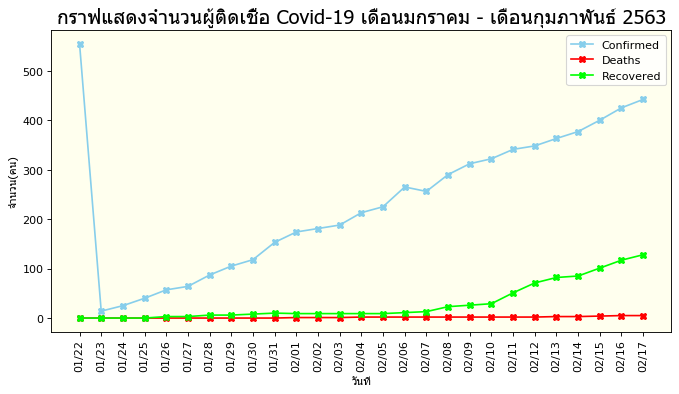

In [36]:
plt.figure(figsize=[10,5],dpi=80)
plt.gca(facecolor= '#FFFFEE')
plt.plot(X,Y1,'skyblue',label = "Confirmed",marker='X')
plt.plot(X,Y2,'r',label = "Deaths",marker='X')
plt.plot(X,Y3,'lime',label = "Recovered",marker='X')
plt.legend()
plt.xticks(rotation = 90)
plt.xlabel('วันที่',fontname='Tahoma')
plt.ylabel('จำนวน(คน)',fontname='Tahoma')
plt.title('กราฟแสดงจำนวนผู้ติดเชื้อ Covid-19 เดือนมกราคม - เดือนกุมภาพันธ์ 2563',fontname='Tahoma',fontsize=18)

# Line Area

## จำนวนผู้ที่ได้รับการยืนยันว่าติดเชื้อเรียงตามวันและเดือน

In [37]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'ผู้ติดเชื้อทั่วโลก เดือนมกราคม - เดือนกุมภาพันธ์ 2563 ')

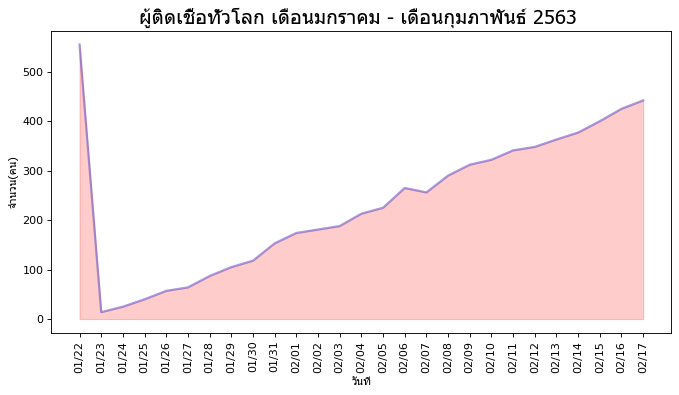

In [40]:
##turnover = [2, 7, 14, 17, 20, 27, 30, 38, 25, 18, 6, 1]
plt.figure(figsize=[10,5],dpi=80)
plt.fill_between(X, Y1,
                 color="r", alpha=0.2)
plt.plot(X, Y1, color="Slateblue",
         alpha=0.6, linewidth=2)
plt.xticks(rotation = 90)
plt.xlabel('วันที่',fontname='Tahoma')
plt.ylabel('จำนวน(คน)',fontname='Tahoma')
plt.title('ผู้ติดเชื้อทั่วโลก เดือนมกราคม - เดือนกุมภาพันธ์ 2563 ',fontname='Tahoma',fontsize=18)

## groupby.  เพื่อดูว่าแต่ละประเทศมีผู้ติดเชื่อจำนวนเท่าไหร่ ในเดือนมกราคม - กุมภาพันธ์ ที่ผ่านมา

In [41]:
Country_coun = df.groupby(['Country'], as_index=False).sum()['Country']

In [45]:
Country_coun

0                Australia
1                  Belgium
2                   Brazil
3                 Cambodia
4                   Canada
5                    China
6                    Egypt
7                  Finland
8                   France
9                  Germany
10               Hong Kong
11                   India
12                   Italy
13             Ivory Coast
14                   Japan
15                   Macau
16                Malaysia
17                  Mexico
18                   Nepal
19             Philippines
20                  Russia
21               Singapore
22             South Korea
23                   Spain
24               Sri Lanka
25                  Sweden
26                  Taiwan
27                Thailand
28                      UK
29                      US
30    United Arab Emirates
31                 Vietnam
Name: Country, dtype: object

In [43]:
Country_confirm = df.groupby(['Country'], as_index=False).sum()['Confirmed']

# Lollipop plot

D:\Python3.7\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 1.0, 'ผู้ติดเชื้อแต่ละประเทศใน เดือนมกราคม - เดือนกุมภาพันธ์')

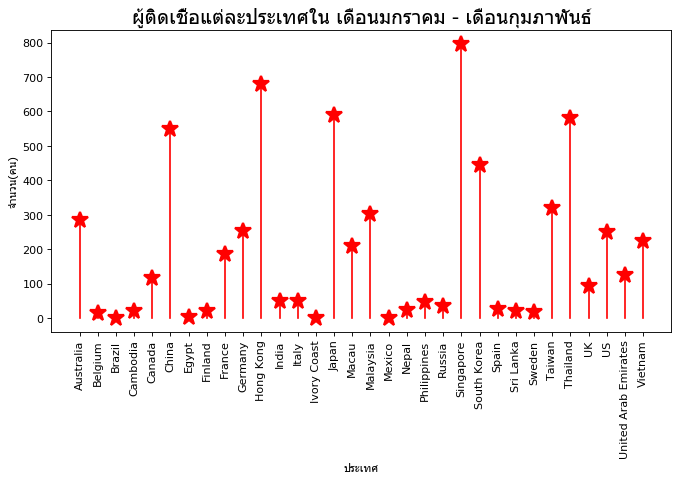

In [44]:
plt.figure(figsize=[10,5],dpi=80)
(markerline, stemlines, baseline) = plt.stem(Country_coun,Country_confirm)
plt.setp(markerline, marker='*', markersize=15,
         markeredgewidth=2, color='r')
plt.setp(stemlines, color='r')
plt.setp(baseline, visible=False)
plt.xticks(rotation = 90)
plt.xlabel('ประเทศ',fontname='Tahoma')
plt.ylabel('จำนวน(คน)',fontname='Tahoma')
plt.title('ผู้ติดเชื้อแต่ละประเทศใน เดือนมกราคม - เดือนกุมภาพันธ์',fontname='Tahoma',fontsize=18)

# Bar Chart 

# แสดงการติดเชื้อในภูมิภาคเอเชียตะวันออกเฉียงใต้

>3.Cambodia

>16.Malaysia

>19.Philippines

>21 Singapore

>27.Thailand

>31.Vietnam

- Create dataframe

In [74]:
dataframe_Coun = pd.DataFrame(list(zip( Country_coun,Country_confirm)), 
                  columns =['Country','Confirmed'])

In [75]:
dataframe_Coun 

,Country,Confirmed
0,Australia,284.0
1,Belgium,14.0
2,Brazil,0.0
3,Cambodia,22.0
4,Canada,116.0
5,China,549.0
6,Egypt,4.0
7,Finland,20.0
8,France,186.0
9,Germany,252.0


In [69]:
dataframe_Coun.iloc[[3, 16, 19, 21, 27, 31], [0, 1]]

,ประเทศ,จำนวนยืนยันผู้ติดเชื้อ
3,Cambodia,22.0
16,Malaysia,303.0
19,Philippines,47.0
21,Singapore,797.0
27,Thailand,581.0
31,Vietnam,225.0


In [76]:
covid_asia = dataframe_Coun.iloc[[3, 16, 19, 21, 27, 31], [0, 1]]
covid_asia 

,Country,Confirmed
3,Cambodia,22.0
16,Malaysia,303.0
19,Philippines,47.0
21,Singapore,797.0
27,Thailand,581.0
31,Vietnam,225.0


Text(0, 0.5, 'Number/Confirmed')

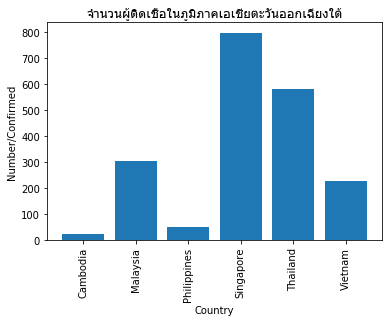

In [96]:
plt.bar([1,2,3,4,5,6],covid_asia.iloc[:,1],tick_label= covid_asia.iloc[:,0]) 
plt.title(u'จำนวนผู้ติดเชื้อในภูมิภาคเอเชียตะวันออกเฉียงใต้',fontname='Tahoma',fontsize='13') 
plt.xlabel('Country') 
plt.xticks(rotation = 90)
plt.ylabel('Number/Confirmed') 

# Tree Map 
> แสดงจำนวนผู้ติดเชื้อในภูมิภาคเอเชียตะวันออกเฉียงใต้

In [78]:
volume = [22, 303, 47, 797, 581, 225]

In [89]:
labels = ['Cambodia\n22', 'Malaysia\n303',
              'Philippines\n47', 'Singapore\n797',
              'Thailand\n581','Vietnam\n225']
color_list = ['#C24641', '#C34A2C', '#C34A2C',
                  '#E42217', '#E41B17', '#DC381F']

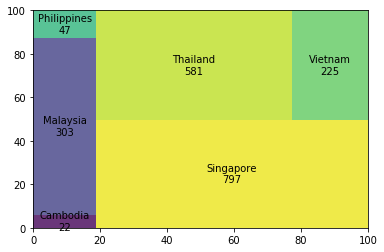

In [93]:
squarify.plot(sizes=volume, label=labels,
                      ##color=color_list,
                      alpha=0.8)

# Pie Chart

> สัดส่วนผู้ติดเชื้อในภูมิภาคเอเชียตะวันออกเฉียงใต้

- Cambodia = 22*100/1795 = 1.22%

- Malaysia = 303*100/1795 = 16.88%

- Philippines = 47*100/1795 = 2.61%

- Singapore = 797*100/1795 = 44.40%

- Thailand = 581*100/1795 = 32.36%

- Vietnam = 225*100/1795 = 12.53%

In [94]:
22*100/1795

1.2256267409470751

In [ ]:
import matplotlib.pyplot as plt

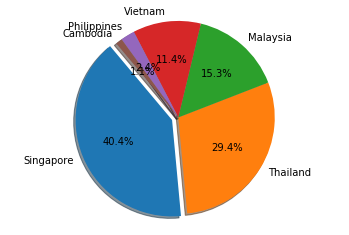

In [95]:
labels = 'Singapore', 'Thailand', 'Malaysia ', 'Vietnam', 'Philippines', 'Cambodia'
sizes = [44.40, 32.36, 16.88, 12.53, 2.61, 1.22]

p = plt.pie(sizes, labels=labels, explode=(0.07, 0, 0, 0, 0, 0),
            autopct='%1.1f%%', startangle=130, shadow=True)
plt.axis('equal')

for i, (Singapore,Thailand,Malaysia,Vietnam,Philippines,Cambodia) in enumerate(p):
    if i > 0:
        Singapore.set_fontsize(12)
        Thailand.set_fontsize(12)
        Malaysia.set_fontsize(12)
        Vietnam.set_fontsize(12)
        Philippines.set_fontsize(12)
        Cambodia.set_fontsize(12)
    
    plt.show()

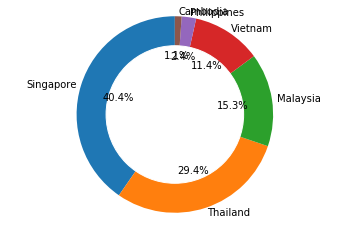

In [97]:
my_circle = plt.Circle((0, 0), 0.7, color='white')

d = plt.pie(sizes, labels=labels, autopct='%1.1f%%',
            startangle=90, labeldistance=1.05)
plt.axis('equal')
plt.gca().add_artist(my_circle)
            
plt.show()

# Line Area

> ผู้ติดเชื้อ Co-vid19 ในเดือนมกราคม - เดือนกุมภาพันธ์ 2563 ในประเทศไทย 

In [25]:
th_X = df[df['Country']=='Thailand']['Date_new']
th_y1 = df[df['Country']=='Thailand']['Confirmed']
th_y2 = df[df['Country']=='Thailand']['Deaths']
th_y3= df[df['Country']=='Thailand']['Recovered']

Text(0.5, 1.0, 'ผู้ติดเชื้อในประเทศไทย')

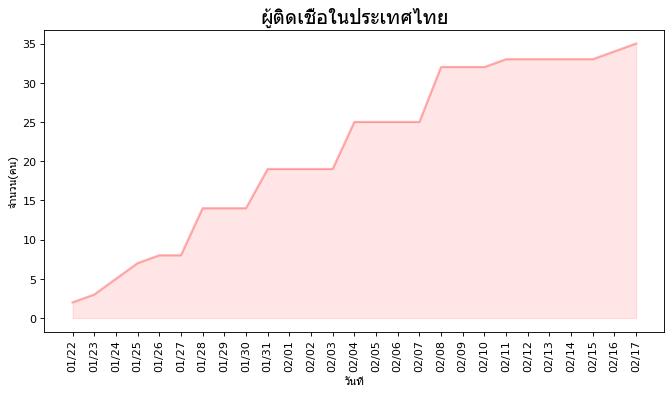

In [142]:
plt.figure(figsize=[10,5],dpi=80)
plt.fill_between(th_X, th_y1,
                 color="r", alpha=0.1)
plt.plot(th_X, th_y1, color="r",
         alpha=0.3, linewidth=2)
plt.xticks(rotation = 90)
plt.xlabel('วันที่',fontname='Tahoma')
plt.ylabel('จำนวน(คน)',fontname='Tahoma')
plt.title('ผู้ติดเชื้อในประเทศไทย',fontname='Tahoma',fontsize=18)

> ผู้ที่หายจากการติดเชื้อ Co-vid19 ในเดือนมกราคม - เดือนกุมภาพันธ์ 2563 ในประเทศไทย 

Text(0.5, 1.0, 'ผู้ที่หายจากการติดเชื้อในประเทศไทย')

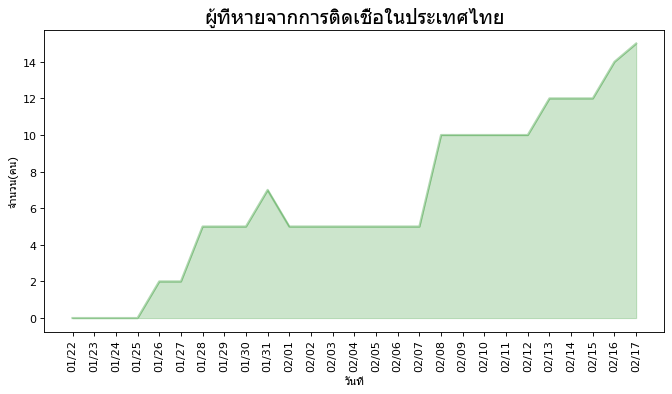

In [141]:
plt.figure(figsize=[10,5],dpi=80)
plt.fill_between(th_X, th_y3,
                 color="g", alpha=0.2)
plt.plot(th_X, th_y3, color="g",
         alpha=0.3, linewidth=2)
plt.xticks(rotation = 90)
plt.xlabel('วันที่',fontname='Tahoma')
plt.ylabel('จำนวน(คน)',fontname='Tahoma')
plt.title('ผู้ที่หายจากการติดเชื้อในประเทศไทย',fontname='Tahoma',fontsize=18)

>>>>> ทดลองทำแบบอื่น 

# Scatter plot

In [24]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [69]:
print(f'max = {max(Y1)}, min = {min(Y1)}')

max = 73260.0, min = 555.0


In [72]:
import numpy as np

In [73]:
colors = []
for i in Y1:
    if i < 2000 :
        colors.append('b')
    elif i < 4000 :
         colors.append('g')
    elif i < 6000 :
         colors.append('y')
    else :
         colors.append('r')
colors

['b',
 'b',
 'b',
 'g',
 'g',
 'y',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r']

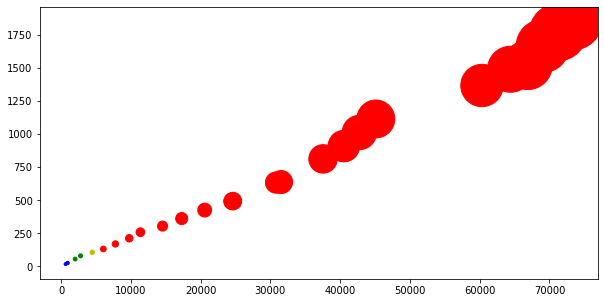

In [81]:
plt.scatter(Y1,Y2,s=0.3*Y3, c = colors)

# Lollipop plot

D:\Python3.7\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 1.0, 'ผู้เสียชีวิตทั่วโลก เดือนมกราคม - เดือนกุมภาพันธ์')

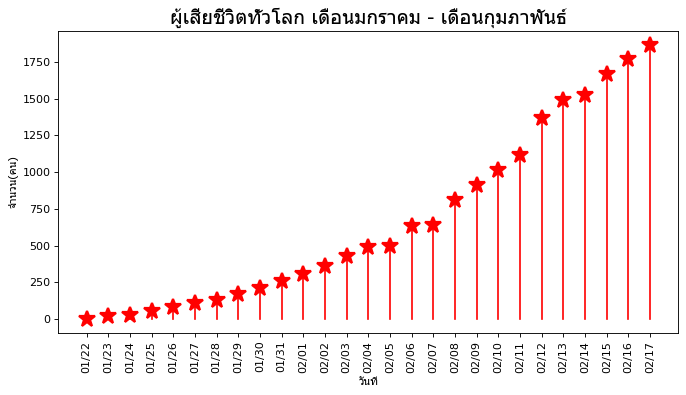

In [87]:
plt.figure(figsize=[10,5],dpi=80)
(markerline, stemlines, baseline) = plt.stem(X,Y2)
plt.setp(markerline, marker='*', markersize=15,
         markeredgewidth=2, color='r')
plt.setp(stemlines, color='r')
plt.setp(baseline, visible=False)
plt.xticks(rotation = 90)
plt.xlabel('วันที่',fontname='Tahoma')
plt.ylabel('จำนวน(คน)',fontname='Tahoma')
plt.title('ผู้เสียชีวิตทั่วโลก เดือนมกราคม - เดือนกุมภาพันธ์',fontname='Tahoma',fontsize=18)

# Bar Chart 

ผู้ติดเชื้อ Co-vid19 ในเดือนมกราคม - เดือนกุมภาพันธ์ 2563

In [26]:
C = df.groupby(['Country'], as_index=False).sum()['Country']
c1 = df.groupby(['Country'], as_index=False).sum()['Confirmed']
c2 = df.groupby(['Country'], as_index=False).sum()['Deaths']
c3 = df.groupby(['Country'], as_index=False).sum()['Recovered']

In [27]:
C

0                Australia
1                  Belgium
2                   Brazil
3                 Cambodia
4                   Canada
5                    China
6                    Egypt
7                  Finland
8                   France
9                  Germany
10               Hong Kong
11                   India
12                   Italy
13             Ivory Coast
14                   Japan
15                   Macau
16          Mainland China
17                Malaysia
18                  Mexico
19                   Nepal
20                  Others
21             Philippines
22                  Russia
23               Singapore
24             South Korea
25                   Spain
26               Sri Lanka
27                  Sweden
28                  Taiwan
29                Thailand
30                      UK
31                      US
32    United Arab Emirates
33                 Vietnam
Name: Country, dtype: object

In [28]:
sum_c1 = c1.sum()

In [29]:
sum_c1 

781452.0

In [30]:
sum_c2 = c2.sum()

In [31]:
sum_c2 

17949.0

In [32]:
sum_c3 = c3.sum()

In [33]:
sum_c3

76258.0

In [34]:
Data = [('Confirmed',781452),
                   ('Deaths',17949),
                    ('Recovered',76258)]

In [35]:
labels = ['Covid-19','Number']

In [36]:
Data_List = pd.DataFrame.from_records(Data,columns=labels)

In [37]:
Data_List 

,Covid-19,Number
0,Confirmed,781452
1,Deaths,17949
2,Recovered,76258


Text(0, 0.5, 'Number')

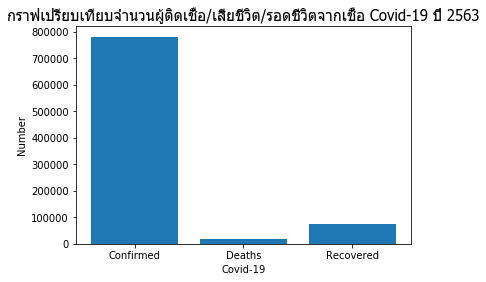

In [38]:
plt.bar([1,2,3],Data_List.iloc[:,1],tick_label=Data_List.iloc[:,0]) 
plt.title(u'กราฟเปรียบเทียบจำนวนผู้ติดเชื้อ/เสียชีวิต/รอดชีวิตจากเชื้อ Covid-19 ปี 2563',fontname='Tahoma',fontsize='15') 
plt.xlabel('Covid-19') 
plt.ylabel('Number') 

In [39]:
from wordcloud import WordCloud
from PIL import Image

# Word Cloud แสดงประเทศที่มีการบันทึกข้อมูลผู้ติดเชื้อ Co-vid19 

In [131]:
Country = df_d.iloc[:,3]

In [132]:
Country

0       China
1       China
2       China
3       China
4       China
        ...  
1714       US
1715       US
1716       US
1717       US
1718       US
Name: Country, Length: 907, dtype: object

In [133]:
textCou = ''

In [134]:
for i in range(len(df_d)):
        x = df_d.iloc[i,3]
        textCou += x

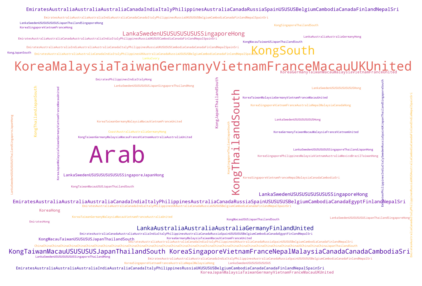

In [135]:
wordcloud = WordCloud(background_color="white" ,width=1280, height=853, max_words=2000,
                      scale=3,margin=2 ,colormap='plasma').generate(textCou)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

# Tree Map แสดงการติดเชื้อใน Mainland China

In [45]:
ch_X = df[df['Country']=='Mainland China']['Date_new']
ch_y1 = df[df['Country']== 'Mainland China']['Confirmed']
ch_y2 = df[df['Country']=='Mainland China']['Deaths']
ch_y3= df[df['Country']== 'Mainland China']['Recovered']

In [46]:
ch_X

38      01/23
39      01/23
40      01/23
41      01/23
42      01/23
        ...  
1672    02/17
1673    02/17
1674    02/17
1681    02/17
1708    02/17
Name: Date_new, Length: 801, dtype: object

In [47]:
ch_y1

38       9.0
39      22.0
40       9.0
41       5.0
42       2.0
        ... 
1672    75.0
1673    72.0
1674    70.0
1681    18.0
1708     1.0
Name: Confirmed, Length: 801, dtype: float64

In [48]:
Confirmed_ch= ch_y1.sum()

In [49]:
Deaths_ch = ch_y2.sum()

In [50]:
Recovered_ch = ch_y3.sum()

In [51]:
volume1 = [Confirmed_ch]

In [52]:
labels1 = ['Confirmed\n 772,951']
color_list1 = ['m']

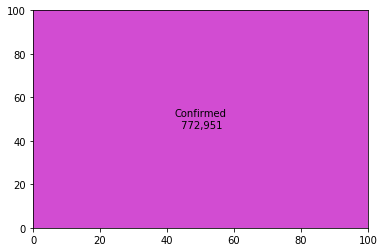

In [53]:
squarify.plot(sizes=volume1, label=labels1,
                      color=color_list1, alpha=0.7)

In [54]:
volume = [Deaths_ch,Recovered_ch]

In [55]:
volume 

[17908.0, 75440.0]

In [56]:
labels = ['Deaths\n 17,908','Recovered\n 75,440']
color_list = ['r','g']

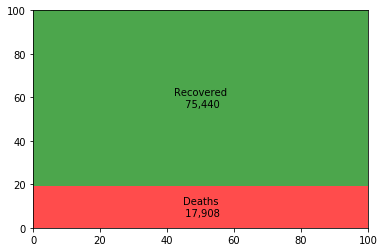

In [57]:
squarify.plot(sizes=volume, label=labels,
                      color=color_list, alpha=0.7)

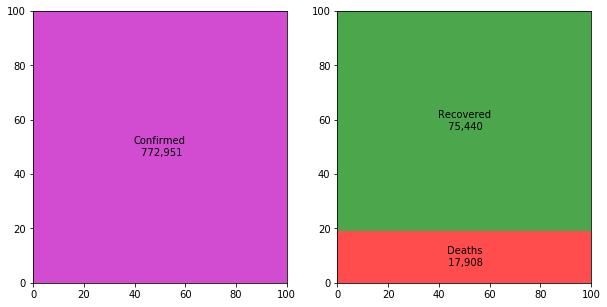

In [58]:
matplotlib.rcParams['figure.figsize'] = [10,5]
plt.subplot(1,2,1)
volume1 = [Confirmed_ch]
labels1 = ['Confirmed\n 772,951']
color_list1 = ['m']
squarify.plot(sizes=volume1, label=labels1,
                      color=color_list1, alpha=0.7)
plt.subplot(1,2,2)
volume = [Deaths_ch,Recovered_ch]
labels = ['Deaths\n 17,908','Recovered\n 75,440']
color_list = ['r','g']
squarify.plot(sizes=volume, label=labels,
                      color=color_list, alpha=0.7)

# scatter Plot

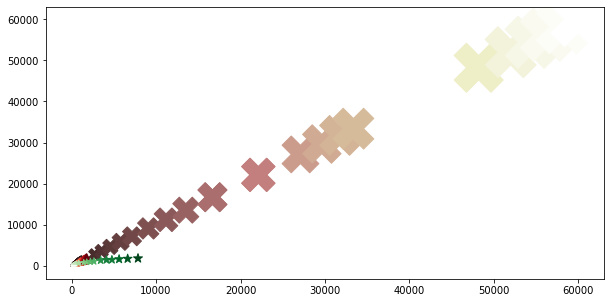

In [95]:
plt.scatter(ch_y1,ch_y1,s=0.05*ch_y1, c = ch_y1, cmap='pink',marker = 'X')
plt.scatter(ch_y2,ch_y2,s=0.05*ch_y2, c = ch_y2, cmap='Reds',marker = '^')
plt.scatter(ch_y3,ch_y2,s=0.05*ch_y2, c = ch_y2, cmap='Greens',marker = '*')